<a href="https://colab.research.google.com/github/MedjialeuJordan/Machine-Learning-Projects/blob/main/Bibliotheque_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torch.nn as nn

model=nn.Sequential(nn.Linear(4,3), nn.ReLU(), nn.Linear(3,1))
x= torch.randn(2, 4)
with torch.no_grad():
  output=model(x)

print("Entrées : \n", x)
print("Sorties : \n", output)

Entrées : 
 tensor([[0.8531, 0.2394, 0.9022, 0.6327],
        [0.7906, 0.1263, 0.3589, 0.9109]])
Sorties : 
 tensor([[-0.3606],
        [-0.3949]])


Exo2 : Classe Embedding pour les plongements superficiels


In [3]:
import torch
import torch.nn as nn
import networkx as nx


def init_embedding(G, d=16):
  n= G.number_of_nodes()
  emb=nn.Embedding(num_embeddings=n, embedding_dim=d)

  with torch.no_grad():
    emb.weight.data=torch.rand(n,d)

  return emb


G=nx.karate_club_graph()
Z=init_embedding(G,d=16)

print("Matrice de plongement Z: ")
print(Z.weight.data)
print("\nRepresentation des sommets 0 et 3 :")
print(Z(torch.LongTensor([0,3])))

Matrice de plongement Z: 
tensor([[4.1530e-01, 6.7376e-01, 7.2959e-01, 3.2488e-01, 9.4860e-01, 2.4971e-02,
         5.9796e-01, 8.6894e-01, 1.6709e-01, 3.5251e-01, 3.5609e-01, 7.7343e-01,
         5.7277e-01, 1.2195e-01, 9.4669e-01, 3.3145e-01],
        [5.7704e-01, 3.2969e-01, 4.9846e-01, 6.3559e-01, 8.9987e-02, 1.3712e-02,
         6.8142e-01, 6.0303e-01, 4.8606e-02, 3.7373e-01, 5.4128e-01, 1.6665e-01,
         7.8265e-01, 8.1658e-01, 5.3618e-01, 2.2506e-01],
        [8.3642e-01, 5.1494e-01, 2.1745e-01, 6.1115e-01, 5.5530e-01, 2.1147e-01,
         6.5212e-01, 4.6274e-01, 6.2756e-01, 3.0069e-01, 4.2118e-01, 5.9125e-01,
         6.1212e-01, 3.7963e-01, 5.9977e-01, 4.9662e-01],
        [9.6286e-01, 6.2600e-01, 7.6864e-01, 3.7174e-01, 5.9728e-01, 8.4040e-01,
         4.3037e-02, 7.2666e-02, 3.8852e-01, 1.7902e-01, 8.4951e-01, 4.1317e-01,
         4.1187e-01, 3.8098e-02, 2.3028e-01, 8.6304e-02],
        [6.7354e-01, 4.1657e-01, 3.3781e-01, 6.3543e-02, 1.0216e-01, 2.6669e-01,
         3.63

Exo3 Plot_embedding pour la production d'un graphe avec des nuages de points

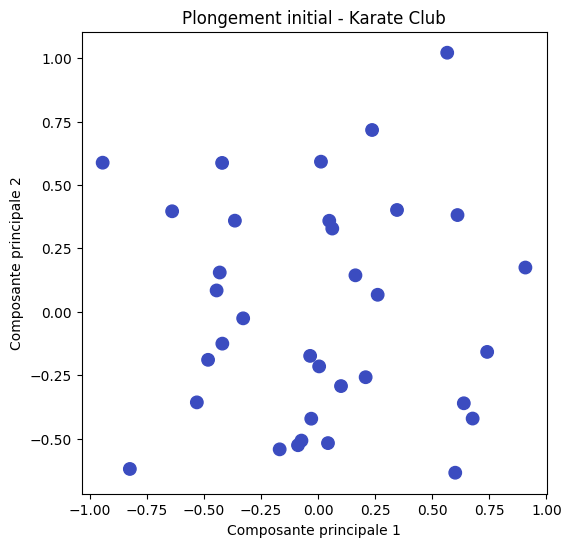

In [4]:
import torch
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import networkx as nx

def plot_embedding(G, emb, title="Embedding Visualization", save_path=None):
  Z = emb.weight.data.numpy()
  pca = PCA(n_components=2)
  Z_2d = pca.fit_transform(Z)

  labels=[]
  for i in range(G.number_of_nodes()):
    club = G.nodes[i].get("club","unknown")
    labels.append(0 if club== "Mr.Hi" else 1)

  plt.figure(figsize=(6, 6))
  plt.scatter(Z_2d[:,0], Z_2d[:,1], c=labels, cmap='coolwarm', s=80)
  plt.title(title)
  plt.xlabel("Composante principale 1")
  plt.ylabel("Composante principale 2")

  if save_path:
    plt.savefig(save_path)
    print(f"Graphique sauvegardé dans : {save_path}")
  else:
    plt.show()


import networkx as nx

G=nx.karate_club_graph()
emb=init_embedding(G, d=16)
plot_embedding(G, emb, title="Plongement initial - Karate Club")

Exo 4 : graph_to_tensor qui recoit un graphe G et renvoie un tenseurs d'entiers de dimensions 2*m

In [5]:
import torch
import networkx as nx

def graph_to_tensor(G):
  edges = list(G.edges())
  u_nodes= [u for u,v in edges]
  v_nodes= [v for u,v in edges]

  edge_tensor = torch.LongTensor([u_nodes, v_nodes])
  return edge_tensor


G = nx.karate_club_graph()
edge_tensor = graph_to_tensor(G)

print("Tenseur d'arètes (2xm) :")
print(edge_tensor)
print("\n Dimensions :", edge_tensor.shape)


Tenseur d'arètes (2xm) :
tensor([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,
          1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  4,
          4,  5,  5,  5,  6,  8,  8,  8,  9, 13, 14, 14, 15, 15, 18, 18, 19, 20,
         20, 22, 22, 23, 23, 23, 23, 23, 24, 24, 24, 25, 26, 26, 27, 28, 28, 29,
         29, 30, 30, 31, 31, 32],
        [ 1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 17, 19, 21, 31,  2,  3,
          7, 13, 17, 19, 21, 30,  3,  7,  8,  9, 13, 27, 28, 32,  7, 12, 13,  6,
         10,  6, 10, 16, 16, 30, 32, 33, 33, 33, 32, 33, 32, 33, 32, 33, 33, 32,
         33, 32, 33, 25, 27, 29, 32, 33, 25, 27, 31, 31, 29, 33, 33, 31, 33, 32,
         33, 32, 33, 32, 33, 33]])

 Dimensions : torch.Size([2, 78])


Exo 5

In [6]:
import torch
import random
import networkx as nx

#la fonction renvoi un vecteurs reels de valeur K
def sample_negative_pairs(G,K):
  nodes = list(G.nodes())
  n= len(nodes)
  neg_pairs=set()

  while len(neg_pairs) < K:
    u, v=random.sample(nodes,2)
    if not G.has_edge(u,v):
      neg_pairs.add((u,v))

  u_nodes = [u for u, v in neg_pairs]
  v_nodes = [v for u, v in neg_pairs]
  neg_tensor = torch.LongTensor([u_nodes, v_nodes])

  return neg_tensor

G = nx.karate_club_graph()
neg_tensor= sample_negative_pairs(G, K=10)

print("Paires négatives échantillonnées :")
print(neg_tensor)


Paires négatives échantillonnées :
tensor([[31, 31,  4, 33, 28, 14,  6, 20, 23, 10],
        [11,  8, 19,  0, 29, 20, 26, 25, 31, 25]])


Exo 6 : Fonction qui recoit 2 vecteurs de longueur K et qui renvoie un tenseur unidimensionel

In [7]:
def compute_dot_prod(emb, pairs_tensor):
  u_nodes = pairs_tensor[0]
  v_nodes = pairs_tensor[1]

  z_u = emb(u_nodes)
  z_v = emb(v_nodes)

  dot_products = torch.sum(z_u * z_v, dim=1)

  return dot_products


G= nx.karate_club_graph()
emb=init_embedding(G, d=16)

pos_pairs = graph_to_tensor(G)
neg_pairs = sample_negative_pairs(G, K=10)

pos_dot = compute_dot_prod(emb, pos_pairs)
neg_dot = compute_dot_prod(emb, neg_pairs)

print("Produit scalaire positif :", pos_dot[:5])
print("Produit scalaire négatif :", neg_dot[:5])


Produit scalaire positif : tensor([4.0115, 4.2092, 2.2914, 5.0750, 4.4504], grad_fn=<SliceBackward0>)
Produit scalaire négatif : tensor([4.9903, 4.6279, 4.0524, 4.0496, 2.8492], grad_fn=<SliceBackward0>)


Exo 7: learn simple pour

*   convertir un graphe en tenseur
*   Initialiser une matrice Z et produire un graphe
* Initailiser une fonction d'optimisation





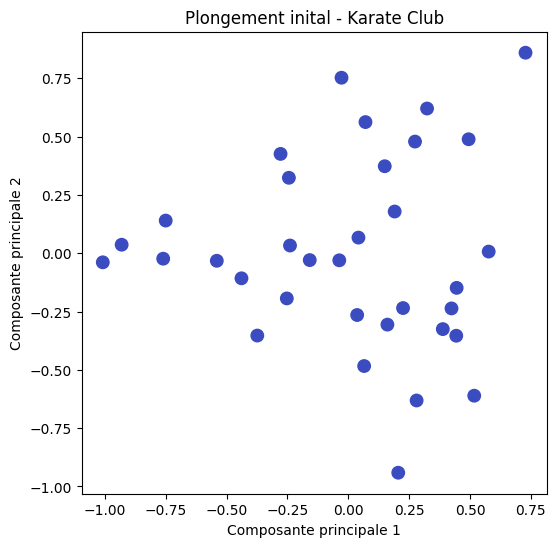

Initialisation terminée
Nombre de sommets:34
- Nombre d’arêtes : 78
- Dimension du vecteur d : 16
- Taux d’apprentissage: 0.01


In [10]:
def learn_simple(G, d=16, eta=0.01, E=500):
  #aide a preparer l'apprentissage
  pos_tensor= graph_to_tensor(G)
  emb=init_embedding(G, d=d)
  plot_embedding(G,emb,title="Plongement inital - Karate Club")
  optimizer= torch.optim.SGD(emb.parameters(), lr=eta)

  print("Initialisation terminée")
  print(f"Nombre de sommets:{G.number_of_nodes()}")
  print(f"- Nombre d’arêtes : {G.number_of_edges()}")
  print(f"- Dimension du vecteur d : {d}")
  print(f"- Taux d’apprentissage: {eta}")

  return pos_tensor, emb, optimizer


G=nx.karate_club_graph()

pos_tensor, emb, optimizer = learn_simple(G, d=16, eta=0.01, E=500)

Train simple embedding: Pour entrainement d'un modele

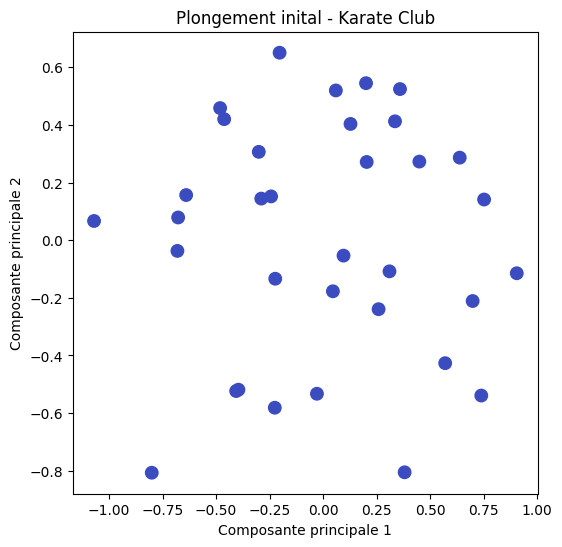

Initialisation terminée
Nombre de sommets:34
- Nombre d’arêtes : 78
- Dimension du vecteur d : 16
- Taux d’apprentissage: 0.1
Epoch 1/500 - Loss: 87.1611
Epoch 51/500 - Loss: 18.9809
Epoch 101/500 - Loss: 8.4258
Epoch 151/500 - Loss: 14.1190
Epoch 201/500 - Loss: 9.3933
Epoch 251/500 - Loss: 8.4149
Epoch 301/500 - Loss: 7.7899
Epoch 351/500 - Loss: 6.0900
Epoch 401/500 - Loss: 7.0990
Epoch 451/500 - Loss: 7.4593
Epoch 500/500 - Loss: 5.8975


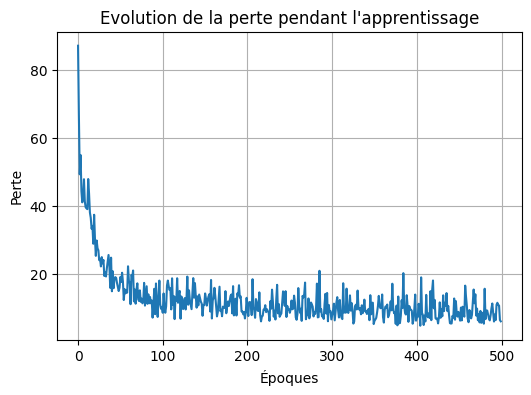

In [13]:
import torch
import torch.nn.functional as F

def train_simple_embedding(G, pos_tensor, emb, optimizer, E=500, k=20):
  losses=[]
  for epoch in range(E):
    optimizer.zero_grad()

    pos_dot=compute_dot_prod(emb, pos_tensor)
    neg_tensor=sample_negative_pairs(G, K=k)
    neg_dot=compute_dot_prod(emb, neg_tensor)

    poss_loss= -F.logsigmoid(pos_dot).sum()
    neg_loss= -F.logsigmoid(-neg_dot).sum()
    loss= poss_loss + neg_loss

    loss.backward()
    optimizer.step()

    losses.append(loss.item())
    if epoch % 50 == 0 or epoch == E - 1:
      print(f"Epoch {epoch + 1}/{E} - Loss: {loss.item():.4f}")

  plt.figure(figsize=(6, 4))
  plt.plot(losses)
  plt.xlabel("Époques")
  plt.ylabel("Perte")
  plt.title("Evolution de la perte pendant l'apprentissage")
  plt.grid(True)
  plt.show()

  return emb

G= nx.karate_club_graph()
pos_tensor, emb, optimizer = learn_simple(G,d=16,eta=0.1,E=500)

trained_emb = train_simple_embedding(G, pos_tensor, emb, optimizer, E=500, k=20)



exo 9 : suite d'apprentissage

Nombre de sommets : 34
Nombre d’arêtes : 78
Taux d’apprentissage  : 0.1,  Époques : 500


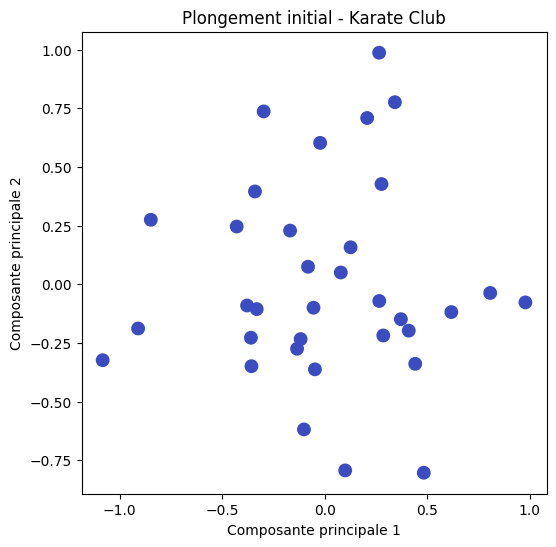

Epoch 1/500 - Loss: 84.4557
Epoch 51/500 - Loss: 12.5065
Epoch 101/500 - Loss: 8.9066
Epoch 151/500 - Loss: 7.5098
Epoch 201/500 - Loss: 10.5016
Epoch 251/500 - Loss: 12.9577
Epoch 301/500 - Loss: 11.5715
Epoch 351/500 - Loss: 6.3797
Epoch 401/500 - Loss: 8.1869
Epoch 451/500 - Loss: 8.4164
Epoch 500/500 - Loss: 9.7538


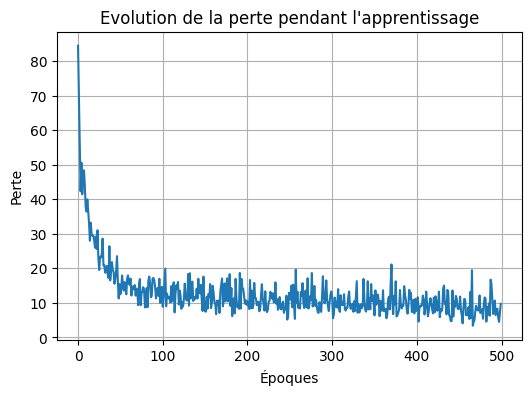

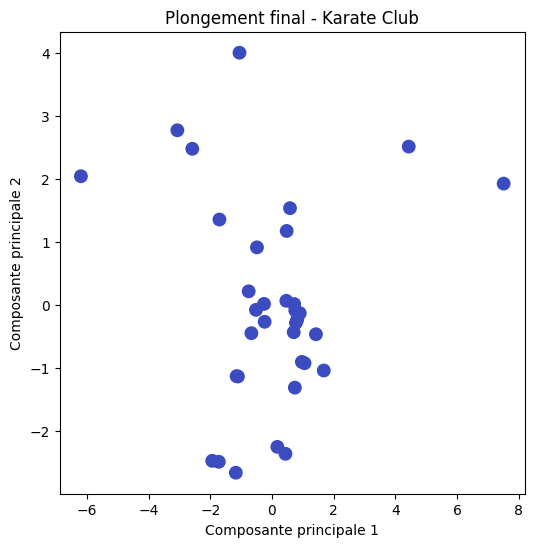

Apprentissage terminée


In [15]:
def learn_simple(G,d=16,eta=0.01,E=500,k=20):
  pos_tensor = graph_to_tensor(G)
  emb = init_embedding(G, d)
  optimizer = torch.optim.SGD(emb.parameters(), lr=eta)

  print(f"Nombre de sommets : {G.number_of_nodes()}")
  print(f"Nombre d’arêtes : {G.number_of_edges()}")
  print(f"Taux d’apprentissage  : {eta},  Époques : {E}")

  plot_embedding(G, emb, title="Plongement initial - Karate Club")

  emb = train_simple_embedding(G, pos_tensor, emb, optimizer, E=E, k=k)

  plot_embedding(G, emb, title="Plongement final - Karate Club")

  return emb

G=nx.karate_club_graph()
emb=learn_simple(G,d=16,eta=0.1,E=500,k=20)




Exo 10 : Entrainement d'un classificateur simple SVM

Nombre de sommets : 34
Nombre d’arêtes : 78
Taux d’apprentissage  : 0.1,  Époques : 500


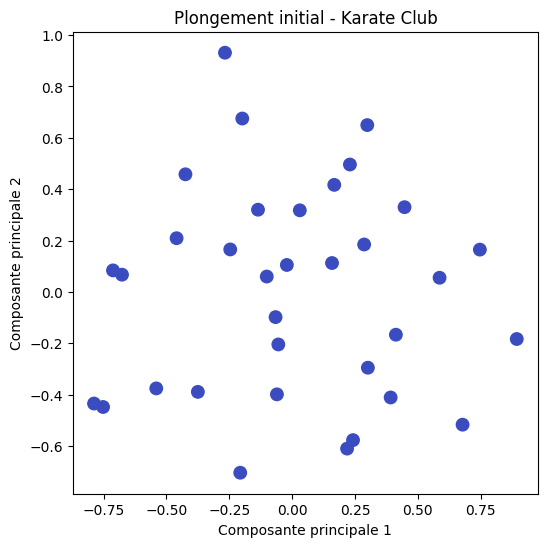

Epoch 1/500 - Loss: 74.2293
Epoch 51/500 - Loss: 15.1395
Epoch 101/500 - Loss: 16.3052
Epoch 151/500 - Loss: 11.5828
Epoch 201/500 - Loss: 8.6559
Epoch 251/500 - Loss: 8.5813
Epoch 301/500 - Loss: 8.2699
Epoch 351/500 - Loss: 12.4609
Epoch 401/500 - Loss: 10.2897
Epoch 451/500 - Loss: 8.8343
Epoch 500/500 - Loss: 8.4065


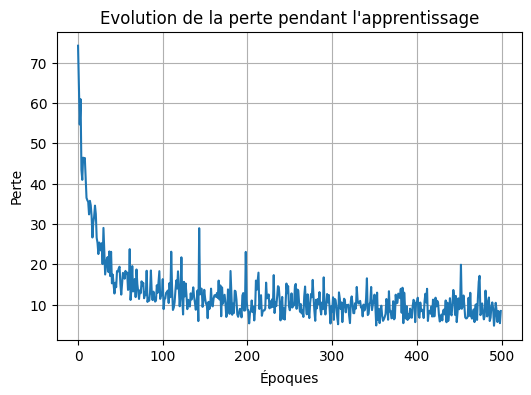

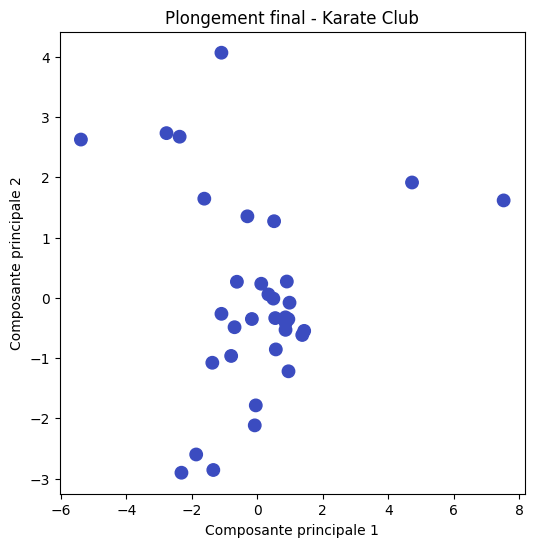

Apprentissage terminée
Précision du modèle : 71.4286%

matrice de confusion:
[[1 2]
 [0 4]]

 Rapport de Classification :
              precision    recall  f1-score   support

      Mr. Hi       1.00      0.33      0.50         3
     officer       0.67      1.00      0.80         4

    accuracy                           0.71         7
   macro avg       0.83      0.67      0.65         7
weighted avg       0.81      0.71      0.67         7



In [20]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


def evaluate_embedding(G, emb):
  Z = emb.weight.data.numpy()

  labels = np.array([0 if G.nodes[i]['club']== "Mr. Hi" else 1 for i in G.nodes])

  X_train,X_test,Y_train,Y_test =train_test_split(Z,labels,test_size=0.2,random_state=42)

  clf= SVC(kernel='rbf', C=1.0, gamma='scale')
  clf.fit(X_train,Y_train)

  Y_pred=clf.predict(X_test)



  acc = accuracy_score(Y_test,Y_pred)

  print(f"Précision du modèle : {acc*100:.4f}%\n")
  print("matrice de confusion:")
  print(confusion_matrix(Y_test,Y_pred))
  print("\n Rapport de Classification :")
  print(classification_report(Y_test,Y_pred, target_names = ["Mr. Hi", "officer"]))

G= nx.karate_club_graph()
emb=learn_simple(G,d=16,eta=0.1,E=500,k=20)
evaluate_embedding(G,emb)

Implementattion du Plongement DeepWalk

Exo 11 : generate_randwalk qui renvoi une marche aleatoire en partant de n'importe quel sommet

In [25]:
import random

def generate_randwalk(G,v,l):

  walk=[v]

  for _ in range(l-1):
    neighbors = list(G.neighbors(walk[-1]))
    if len(neighbors) == 0:
      break
    next_node=random.choice(neighbors)
    walk.append(next_node)

  return walk

G = nx.karate_club_graph()
random_walk= generate_randwalk(G,v=0,l=10)

print("Marche aleatoire a partir du sommet 0")
print(random_walk)


Marche aleatoire a partir du sommet 0
[0, 3, 7, 3, 2, 27, 24, 31, 24, 31]


Exo 12 : Generation de plusieurs marches aleatoires pour chaque sommet du graphe


In [28]:
def generate_randwalk_list(G, T, l):

  walks=[]
  for node in G.nodes():
    for _ in range(T):
      walk = generate_randwalk(G, v=node, l=l)
      walks.append(walk)

  return walks

G = nx.karate_club_graph()

walks = generate_randwalk_list(G, T=3, l=20)

print(f"Nombre de marches aleatoires : {len(walks)}")
print("Exemple de marche :", walks[0])

Nombre de marches aleatoires : 102
Exemple de marche : [0, 31, 33, 29, 23, 29, 26, 29, 26, 33, 19, 1, 7, 1, 13, 2, 3, 7, 2, 13]


Exo 13 : Construction des exemples positifs à part

In [29]:
def build_positive_ex(walks,delta):
  pos_pairs= []

  for walk in walks:
    L= len(walk)

    for t in range(L):
      v_t = walk[t]
      start = max(0, t-delta)
      end = min(L, t+delta+1)

      for u in walk[start:end]:
        if u != v_t:
          pos_pairs.append((v_t,u))

  u_nodes = [u for u, v in pos_pairs]
  v_nodes = [v for u, v in pos_pairs]
  pos_tensor = torch.LongTensor([u_nodes, v_nodes])

  return pos_tensor

G= nx.karate_club_graph()
walks = generate_randwalk_list(G, T=3, l=20)
pos_tensor = build_positive_ex(walks, delta=2)

print("Exemples positifs :")
print("Tenseurs des pairs positives",pos_tensor.shape)
print("Exemple de paires ", pos_tensor[:,:10])




Exemples positifs :
Tenseurs des pairs positives torch.Size([2, 6732])
Exemple de paires  tensor([[ 0,  0, 21, 21, 21,  1,  1,  1,  1,  2],
        [21,  1,  0,  1,  2,  0, 21,  2,  9, 21]])


Exo 14: Generation des exemples négatifs

In [32]:
from numpy.random.mtrand import sample
def sample_negative_ex(G,T0,k):
  T1 = T0[0].repeat_interleave(k)

  degrees = np.array([G.degree(v) for v in G.nodes()])
  probs = degrees ** 0.75
  weights = probs / probs.sum()

  nodes = list(G.nodes())
  sampled_nodes = np.random.choice(nodes, size=len(T1), p=weights)

  T2= torch.LongTensor(sampled_nodes)

  T3 = torch.stack([T1,T2])

  return T3

walks = generate_randwalk_list(G,T=2,l=8)
T0 = build_positive_ex(walks, delta=2)

T3 = sample_negative_ex(G, T0, k=3)

print("Tenseur négatif:",T3.shape)
print("Exemple de paires négatives")
print(T3[:,:10])

Tenseur négatif: torch.Size([2, 4758])
Exemple de paires négatives
tensor([[ 0,  0,  0,  0,  0,  0,  1,  1,  1,  1],
        [16,  2, 19, 32,  0,  1, 32, 30, 32,  4]])


Exo 15: implementation de la fonction d'entrainement

Epoch 1/500 - Loss: 144327.9375
Epoch 51/500 - Loss: 27717.5684
Epoch 101/500 - Loss: 27500.8438
Epoch 151/500 - Loss: 27518.0371
Epoch 201/500 - Loss: 27472.1543
Epoch 251/500 - Loss: 27499.2363
Epoch 301/500 - Loss: 27556.9922
Epoch 351/500 - Loss: 27504.3516
Epoch 401/500 - Loss: 27565.0234
Epoch 451/500 - Loss: 27523.4629
Epoch 500/500 - Loss: 27509.4277


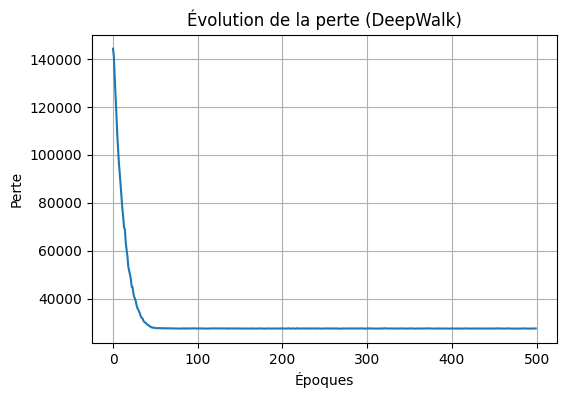

In [34]:
from operator import pos
def train_deepwalk_embedding(G,emb,pos_tensor,optimizer,E=500,k=5):

  losses = []

  for epoch in range(E):
    optimizer.zero_grad()

    pos_dot = compute_dot_prod(emb, pos_tensor)
    neg_tensor = sample_negative_ex(G, pos_tensor, k=k)
    neg_dot = compute_dot_prod(emb, neg_tensor)

    pos_loss = -F.logsigmoid(pos_dot).sum()
    neg_loss = -F.logsigmoid(-neg_dot).sum()
    loss = pos_loss + neg_loss

    loss.backward()
    torch.nn.utils.clip_grad_norm_(emb.parameters(), max_norm=5.0)
    optimizer.step()

    losses.append(loss.item())
    if epoch % 50 == 0 or epoch == E - 1:
      print(f"Epoch {epoch + 1}/{E} - Loss: {loss.item():.4f}")

      # 📈 Visualisation de la perte
  plt.figure(figsize=(6,4))
  plt.plot(losses)
  plt.title("Évolution de la perte (DeepWalk)")
  plt.xlabel("Époques")
  plt.ylabel("Perte")
  plt.grid(True)
  plt.show()

  return emb


G=nx.karate_club_graph()
optimizer = torch.optim.SGD(emb.parameters(), lr=0.1)

walks = generate_randwalk_list(G, T=3, l=20)

pos_tensor = build_positive_ex(walks, delta=2)

emb_dw = train_deepwalk_embedding(G, emb, pos_tensor, optimizer, E=500, k=5)


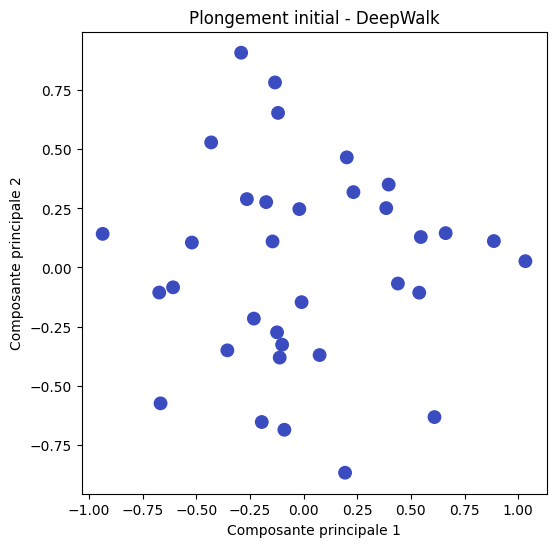

Nombre de sommets : 34
Nombre d’arêtes : 78
Dimension du vecteur d : 16
Taux d’apprentissage : 0.1, Époques : 500
Nombre de marches par sommet (T) : 10
Longueur de marche (l) : 40
Taille de fenêtre (delta) : 5
Facteur d’échantillonnage négatif (k) : 5
Epoch 1/500 - Loss: 2158203.0000
Epoch 51/500 - Loss: 474087.5000
Epoch 101/500 - Loss: 473920.3750
Epoch 151/500 - Loss: 473949.6562
Epoch 201/500 - Loss: 473675.1875
Epoch 251/500 - Loss: 473917.2812
Epoch 301/500 - Loss: 473891.0625
Epoch 351/500 - Loss: 473775.4375
Epoch 401/500 - Loss: 473843.4062
Epoch 451/500 - Loss: 473773.3125
Epoch 500/500 - Loss: 473889.4688


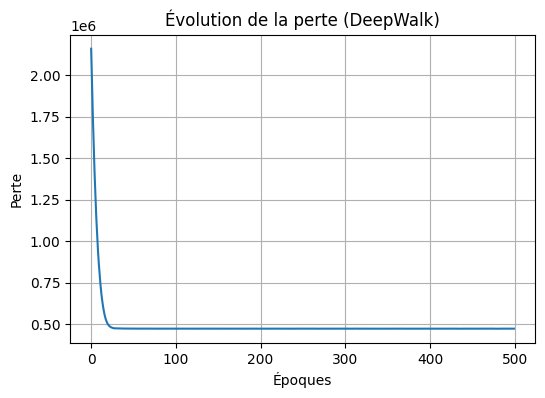

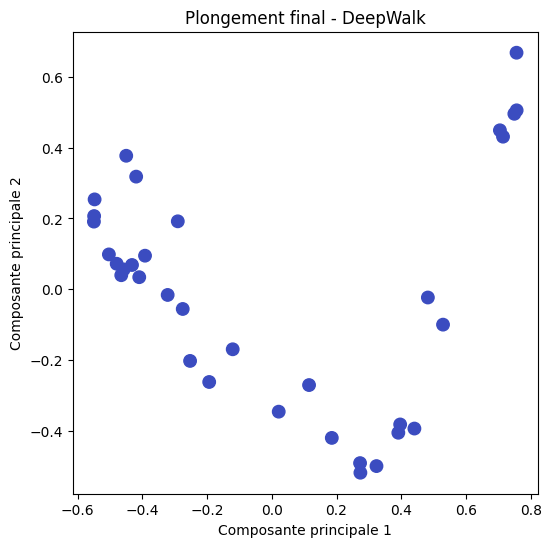

In [35]:
import torch
import networkx as nx
import matplotlib.pyplot as plt

def learn_deepwalk(G, d=16, eta=0.01, E=500, T=10, l=40, delta=5, k=5):
  # 1. Initialiser l’Embedding Z et produire une figure
  emb = init_embedding(G, d=d)
  plot_embedding(G, emb, title="Plongement initial - DeepWalk")

  # 2. Générer la liste de marches aléatoires et produire les exemples positifs
  walks = generate_randwalk_list(G, T=T, l=l)
  pos_tensor = build_positive_ex(walks, delta=delta)

  # 3. Initialiser l’Optimizer, réaliser l’apprentissage, produire un graphique de Z
  optimizer = torch.optim.SGD(emb.parameters(), lr=eta)

  print(f"Nombre de sommets : {G.number_of_nodes()}")
  print(f"Nombre d’arêtes : {G.number_of_edges()}")
  print(f"Dimension du vecteur d : {d}")
  print(f"Taux d’apprentissage : {eta}, Époques : {E}")
  print(f"Nombre de marches par sommet (T) : {T}")
  print(f"Longueur de marche (l) : {l}")
  print(f"Taille de fenêtre (delta) : {delta}")
  print(f"Facteur d’échantillonnage négatif (k) : {k}")


  trained_emb = train_deepwalk_embedding(G, emb, pos_tensor, optimizer, E=E, k=k)

  plot_embedding(G, trained_emb, title="Plongement final - DeepWalk")

  return trained_emb

# Example usage:
G = nx.karate_club_graph()
deepwalk_emb = learn_deepwalk(G, d=16, eta=0.1, E=500, T=10, l=40, delta=5, k=5)